# Uma análise do Campeonato Brasileiro de Futebol
## Por Daniele Cavalcante e Leonardo Oliveira
Também conhecido como Brasileirão, o Campeonato Brasileiro de Futebol é a principal competição futebolística do país desde 1959. Até hoje, um total de 156 clubes já participaram e apenas 17 conseguiram ser coroados campeões, dos quais 12 conquistaram o título mais de uma vez. 

Apesar de o campeonato ter início em 1959, o dataset a ser analisado possui dados a partir do ano 2000 até 2021. 

Nas células a seguir, faremos a importação das bibliotecas necessárias para manipulação de dados e plotagem de histogramas.  


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Carrega o dataset
dfDataChampionship = pd.read_csv("./campeonato-brasileiro-full.csv", delimiter=";")

# String
dfDataChampionship = dfDataChampionship.applymap(str);  

# Cria uma nova coluna 'Placar'
dfDataChampionship["Placar"] = dfDataChampionship["Mandante Placar"].map(str) + "x" + dfDataChampionship["Visitante Placar"]

# Remove colunas desnecessárias 
dfDataChampionship = dfDataChampionship.drop(['Estado Mandante', 'Estado Visitante', 'Estado Vencedor'], axis=1)

# Exibe as primeiras linhas da tabela
dfDataChampionship.tail()

,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Placar
8342,8343,3,13/06/2021,16:00,Domingo,grêmio,athletico-pr,athletico-pr,Arena do Grêmio,0,1,0x1
8343,8344,3,13/06/2021,20:30,Domingo,bahia,internacional,internacional,Pituaçu,0,1,0x1
8344,8345,3,13/06/2021,20:30,Domingo,fortaleza,sport,fortaleza,Castelão,1,0,1x0
8345,8346,3,13/06/2021,20:30,Domingo,bragantino,fluminense,-,Nabi Abi Chedid,2,2,2x2
8346,8347,3,13/06/2021,20:30,Domingo,chapecoense,ceará,-,Arena Condá,0,0,0x0


In [3]:
#dfDataChampionship['Data'].unique()

# Converte a coluna 'Data' no formato %d/%m/%y para o formato %y-%m-%d
pd.to_datetime(dfDataChampionship['Data'], infer_datetime_format=True)

0      2000-07-29
1      2000-07-29
2      2000-07-29
3      2000-07-30
4      2000-07-30
          ...    
8342   2021-06-13
8343   2021-06-13
8344   2021-06-13
8345   2021-06-13
8346   2021-06-13
Name: Data, Length: 8347, dtype: datetime64[ns]

# Campeonato Brasileirão 2020

Existem 20 clubes no Brasileirão. Durante uma temporada (de maio a dezembro), cada clube joga os outros duas vezes (um sistema duplo de jogos), uma vez em seu estádio e outra em seus adversários, por um total de 38 jogos. As equipes recebem três pontos por vitória e um ponto por empate. Nenhum ponto é concedido por uma perda. As equipes são classificadas por total de pontos, vitórias, diferença de gols e gols marcados. No final de cada temporada, o clube com mais pontos é coroado campeão. 


Sabendo disso, nas próximas células, faremos a filtragem de partidas ocorridas entre  maio de 2020 até fevereiro de 2021 (término atrasado devido a pandemia do Coronavírus).

In [4]:
# PG: pontos ganhos j: jogos realizados V: vitórias E: empates D: derrotas
# GP: gols pró(gols feitos) GC: gols contra(gols sofridos) SG: saldo de gols(GP - GC)
d = {'Clubes': [], 'PG': [], 'j': [], 'V': [], 'E': [], 'D': [], 'GP': [], 'GC': [], 'SG': []}
dfClassChampionship = pd.DataFrame(data=d);

In [5]:
dfDataChampionship['Data'] = pd.to_datetime(dfDataChampionship['Data'], infer_datetime_format=True)

filter1  =  dfDataChampionship["Data"]>='2020-01-01'
filter2  =  dfDataChampionship["Data"]<='2021-02-26' # o Brasileirao 2020 teve seu fim em 2021 devido a pandemia

brasilianLeague = dfDataChampionship[filter1 & filter2]
brasilianLeague

,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Placar
7939,7940,1,2020-08-08,19:00,Sábado,Fortaleza,Athlético-PR,Athlético-PR,Castelão,0,2,0x2
7940,7941,1,2020-08-08,19:30,Sábado,Coritiba,Internacional,Internacional,Couto Pereira,0,1,0x1
7941,7942,1,2020-08-08,21:00,Sábado,Sport,Ceará,Sport,Ilha do Retiro,3,2,3x2
7942,7943,1,2020-08-09,16:00,Domingo,Flamengo,Atlético-MG,Atlético-MG,Maracanã,0,1,0x1
7943,7944,1,2020-08-09,16:00,Domingo,Santos,Bragantino,-,Vila Belmiro,1,1,1x1
...,...,...,...,...,...,...,...,...,...,...,...,...
8314,8315,38,2021-02-25,21:30,Quinta-Feira,Internacional,Corinthians,-,Beira Rio,0,0,0x0
8315,8316,38,2021-02-25,21:30,Quinta-Feira,Bahia,Santos,Bahia,Itaipava Arena Fonte Nova,2,0,2x0
8316,8317,38,2021-02-25,21:30,Quinta-Feira,Athlético-PR,Sport,Athlético-PR,Arena da Baixada,2,0,2x0
8317,8318,38,2021-02-25,21:30,Quinta-Feira,Ceará,Botafogo-RJ,Ceará,Castelão,2,1,2x1


Feito a filtragem de todas as partidas ocorridas no Brasileirão 2020, iremos retornar um novo DataFrame contendo todos os nomes de clubes participantes ao concatenar as colunas 'Mandante' e 'Visitante' sem repetições.

In [6]:
# Cancatenando as colunas
clubs  =  pd.concat([brasilianLeague['Mandante'].str.lower(), brasilianLeague['Visitante'].str.lower()], axis=1, keys=['Clubes'])
cb  =  pd.Series(clubs['Clubes'].unique(), name="Clubes") # unique retorna valores sem repetição
cb  =  cb.to_frame() # convert Series to DataFrame 
cb # exibe o dataframe 

,Clubes
0,fortaleza
1,coritiba
2,sport
3,flamengo
4,santos
5,grêmio
6,botafogo-rj
7,corinthians
8,goiás
9,palmeiras


Obtendo-se todos os clubes participantes, a próxima célula contém funções que irá calcular, para cada time, o número de vitórias, partidas, pontos, empate, derrota, gols feitos e gols sofridos. 
Passaremos como paramêtro o período ocorrido e o clube.


In [7]:
# Retorna o numero de vitórias do time
def getNumberWinner(data, clube ):
    df = data.apply(lambda x: x.astype(str).str.strip())
    filter = df["Vencedor"].str.lower() == clube
    return (data[filter]['Vencedor'].count()).astype(np.int64)

# Retorna o número de partidas realizadas pelo time
def getNumberDepartures(data, clube ):
    df = data.apply(lambda x: x.astype(str).str.strip())
    filter1 = df["Mandante"].str.lower() == clube
    filter2 = df["Visitante"].str.lower() == clube
    return (data[filter1]['Mandante'].count() + data[filter2]['Visitante'].count()).astype(np.int64)

# Retorna o número de pontos conquistados pelo time
def getPoints(data, clube ):
    df = data.apply(lambda x: x.astype(str).str.strip())
    filter1 = df["Mandante"].astype(str).str.lower() == clube
    filter2 = df["Visitante"].astype(str).str.lower() == clube
    filter3 = df["Vencedor"].astype(str).str.lower() == clube
    filter4 = (df["Mandante"].astype(str).str.lower() == clube) | (df["Visitante"].astype(str).str.lower() == clube)
    filter5 = df["Vencedor"].astype(str).str.lower() == '-'
    
    v1 = data[(filter1) & (filter3)]
    v1 = v1['Vencedor'].count()
    v2 = data[(filter2) & (filter3)]
    v2 = v2['Vencedor'].count() 
    v3 = data[(filter4) & (filter5)]
    v3 = v3['Vencedor'].count()
    return ((v2*3)+(v1*3)+v3).astype(np.int64)

# Retorna o número de empates do time
def getDraw(data, clube ):
    df = data.apply(lambda x: x.astype(str).str.strip())
    filter1 = (df["Mandante"].astype(str).str.lower() == clube) | (df["Visitante"].astype(str).str.lower() == clube)
    filter2 = df["Vencedor"].astype(str).str.lower() == '-'
    df = data[(filter1) & (filter2)]
    empates = df['Vencedor'].astype(str).count()
    return empates.astype(np.int64)

# Retorna o número de derrotas do time
def getDefeats(data, clube ):
    df = data.apply(lambda x: x.astype(str).str.strip())
    filter1 = (df["Mandante"].astype(str).str.lower() == clube) | (df["Visitante"].astype(str).str.lower() == clube)
    filter2 = (df["Vencedor"].astype(str).str.lower() != clube) & (df["Vencedor"].astype(str).str.lower() != '-')
    df = data[(filter1) & (filter2)]
    derrotas = df['Vencedor'].count()
    return derrotas.astype(np.int64)

# Retorna os gols feitos e gols tomados pelo time
def getGP(data, clube ):
    df = data.apply(lambda x: x.astype(str).str.strip())
    filter1  =  df["Mandante"].astype(str).str.lower() == clube
    filter2  =  df["Visitante"].astype(str).str.lower() == clube
    df1      =  data[(filter1)]
    df2      =  data[(filter2)]
    placar1  =  df1['Placar'].astype(str).str.split('x')
    placar2  =  df2['Placar'].astype(str).str.split('x')
    
    gp       =  0
    gc       =  0
    for g1, g2 in placar1:
        gp = (gp + pd.to_numeric( g1 ))
        gc = (gc + pd.to_numeric( g2 ))
            
    for g1, g2 in placar2:
        gp = (gp + pd.to_numeric( g2 )) 
        gc = (gc + pd.to_numeric( g1 ))
    return gp, gc

Com as funções definidas, agora podemos montar a tabela geral para o Brasileirão 2020.

In [8]:
dfTable = cb[["Clubes"]].copy()
for column in ["PG", "J", "V", "E", "D", "GP", "GC", "SG"]:
    dfTable[column] = 0

def ensureUtf(s, encoding='utf8'):
  if type(s) == bytes:
    return s.decode(encoding, 'ignore')
  else:
    return s

for index, row in dfTable.iterrows():
    c1  =  row['Clubes']
    c1  =  ensureUtf( c1 )
    c1  =  c1.strip()
    
    pg       =  getPoints(brasilianLeague, c1 )
    j        =  getNumberDepartures(brasilianLeague, c1 )
    v        =  getNumberWinner(brasilianLeague, c1 )
    e        =  getDraw(brasilianLeague, c1 )
    d        =  getDefeats(brasilianLeague, c1 )
    gp, gc   =  getGP(brasilianLeague, c1 )
    
    dfTable.at[index, 'PG'] = pg
    dfTable.at[index, 'J']  = j
    dfTable.at[index, 'V']  = v
    dfTable.at[index, 'E']  = e
    dfTable.at[index, 'D']  = d
    dfTable.at[index, 'GP'] = gp
    dfTable.at[index, 'GC'] = gc
    dfTable.at[index, 'SG'] = gp - gc

dfTable['Clubes'] = dfTable['Clubes'].str.capitalize() 
dfTable  =  dfTable.sort_values(by=['PG'], ascending=False) # ordena os valores
dfTable  =  dfTable.reset_index(drop=True)

dfTable # exibe a tabela do Brasileirao 2020

,Clubes,PG,J,V,E,D,GP,GC,SG
0,Flamengo,71,38,21,8,9,68,48,20
1,Internacional,70,38,20,10,8,61,35,26
2,Atlético-mg,68,38,20,8,10,64,45,19
3,São paulo,66,38,18,12,8,59,41,18
4,Fluminense,64,38,18,10,10,55,42,13
5,Grêmio,59,38,14,17,7,53,40,13
6,Palmeiras,58,38,15,13,10,51,37,14
7,Santos,54,38,14,12,12,52,51,1
8,Bragantino,53,38,13,14,11,50,40,10
9,Athlético-pr,53,38,15,8,15,38,36,2


Agora que temos o DataFrame do Brasileirão 2020 completo, as próximas células farão uso desses dados para gerar gráficos de comparação entre os times de fácil visualização.

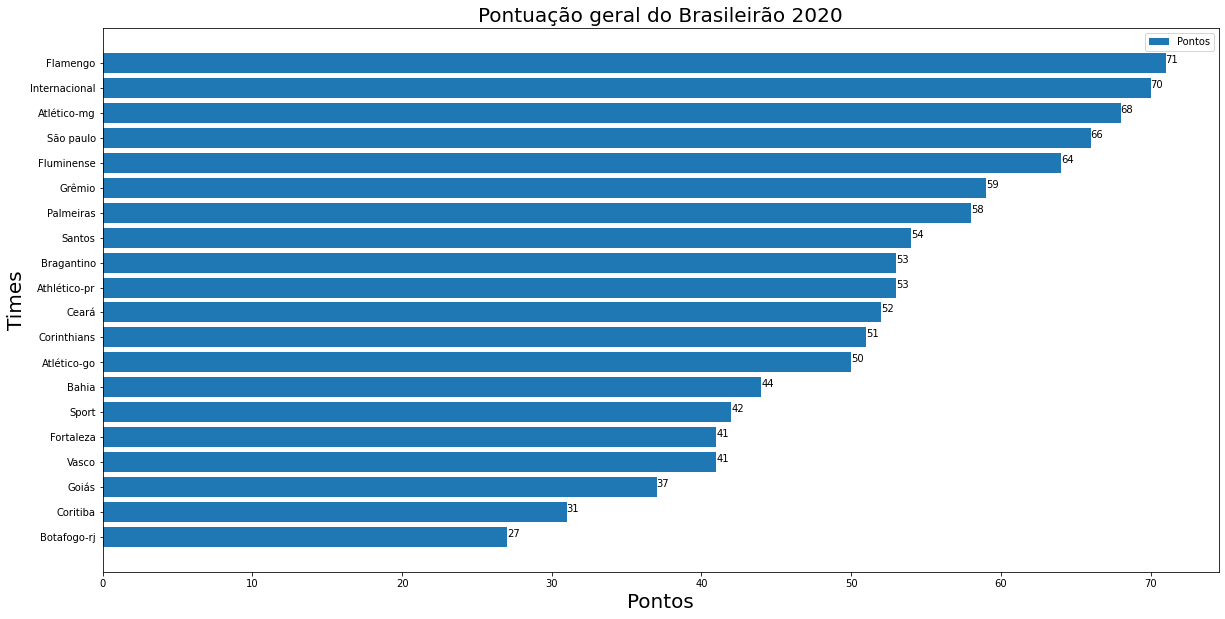

In [9]:
# Gráfico de pontos ganhos por time no Brasileirão janeiro/2020 - fevereiro/2021
plt.figure(figsize=(20, 10))
pg = dfTable['PG'].sort_values(ascending=False)
pg.sort_values(ascending=True, inplace=True)

plt.barh(dfTable['Clubes'], dfTable['PG'], label='Pontos')

plt.title('Pontuação geral do Brasileirão 2020', size=20)
plt.xlabel("Pontos", size=20)
plt.ylabel("Times", size=20)

for index, value in enumerate(dfTable['PG']):
    plt.text(value, index, str(value)) 

plt.gca().invert_yaxis()
plt.legend()
plt.show()

Por ser o líder no ranking de pontuação, concluimos que o Flamento foi o campeão do Brasileirão 2020.

Além disso, desde a edição de 2016, os seis principais clubes do Brasileirão se classificam para a Copa Libertadores do próximo ano, que são eles: Flamengo, Internacional, Atlético-MG, São Paulo, Fluminense e Grêmio, segundo o gráfico acima. 

Os quatro principais clubes - Flamengo, Internacional, Atlético-MG e São Paulo - entram diretamente na fase de grupos. O quinto e o sexto colocados - Fluminense e Grêmio -  entram na Libertadores na segunda rodada e devem vencer duas etapas eliminatórias para entrar na fase de grupos.

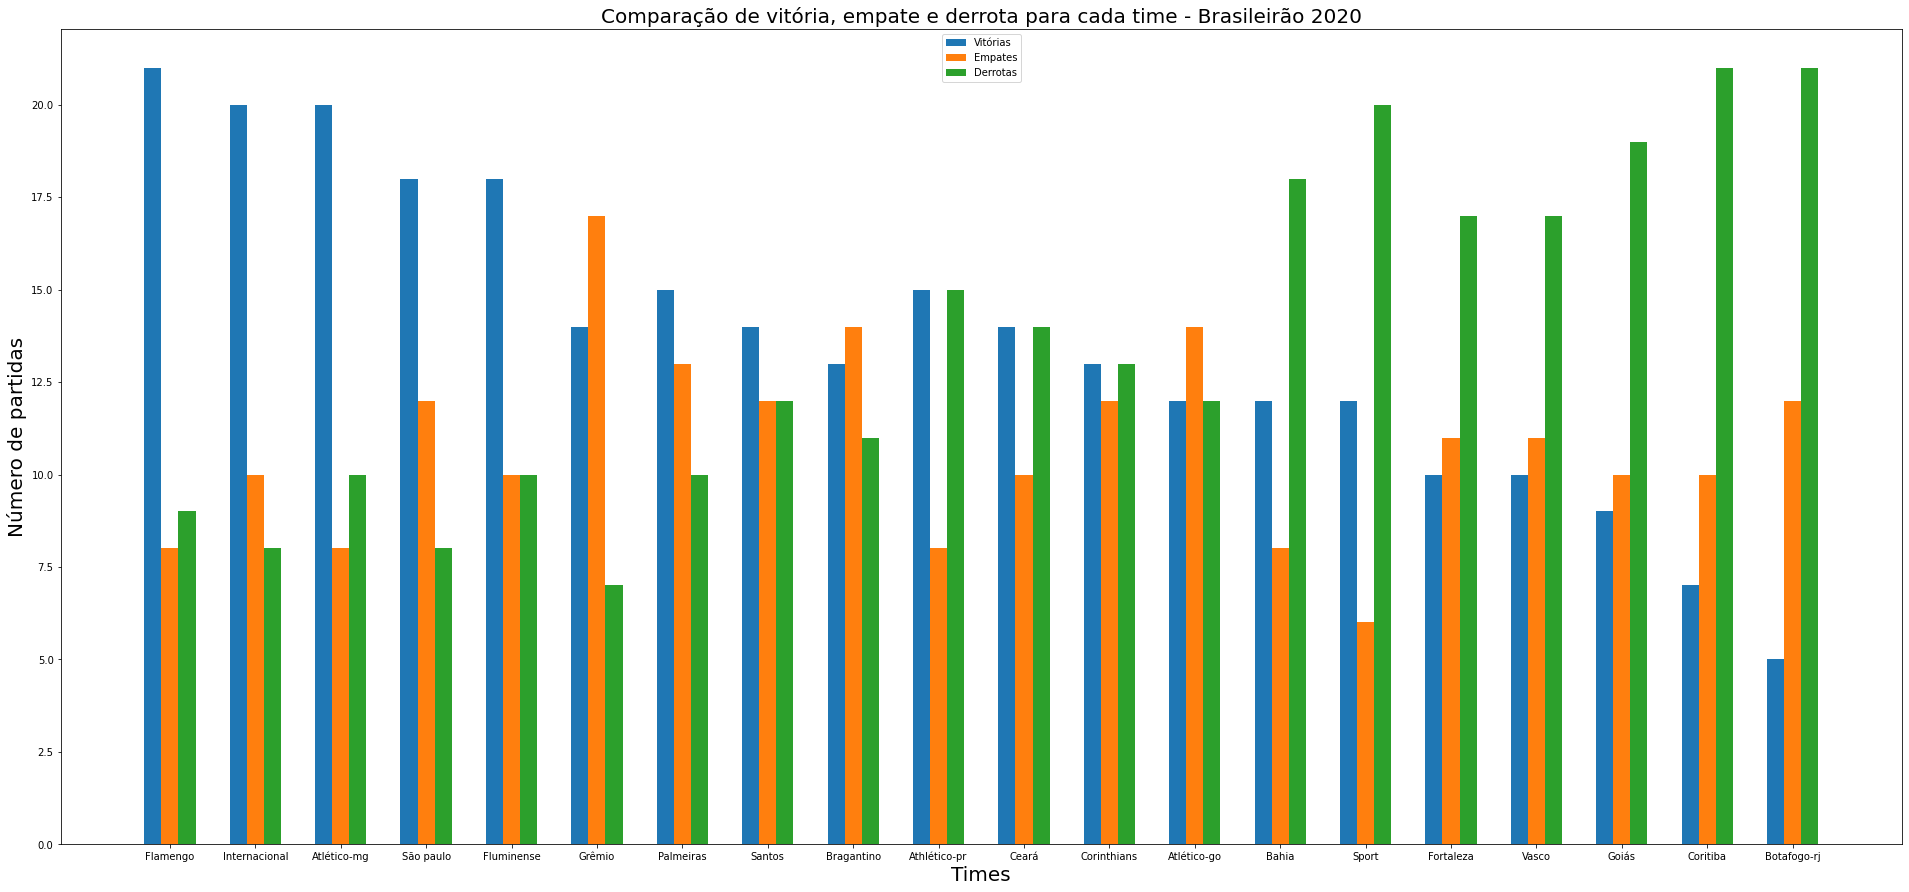

In [10]:
plt.figure(figsize=(33, 15))

Pos = np.array(range(len(dfTable)))
width = 0.2

plt.bar(Pos-width, dfTable['V'], width=width, label='Vitórias')
plt.bar(Pos, dfTable['E'], width=width, label='Empates')
plt.bar(Pos+width, dfTable['D'], width=width, label='Derrotas')

plt.title('Comparação de vitória, empate e derrota para cada time - Brasileirão 2020', size=20)
plt.xlabel("Times", size=20)
plt.ylabel("Número de partidas", size=20)

plt.xticks(Pos, dfTable['Clubes'])
plt.legend()
plt.show()

Sabemos que a quantidade de partidas jogadas para cada time é a mesma (38 partidas), então a soma de vitória, derrota e empate para cada time é o mesmo. 

Além disso, percebemos que o número de vitórias do primeiro time (Flamengo) é aproximadamento igual ao número de derrotas do último time (Botafogo-rj), o mesmo vale para o segundo e penúltimo time, e assim suscessivamente. 

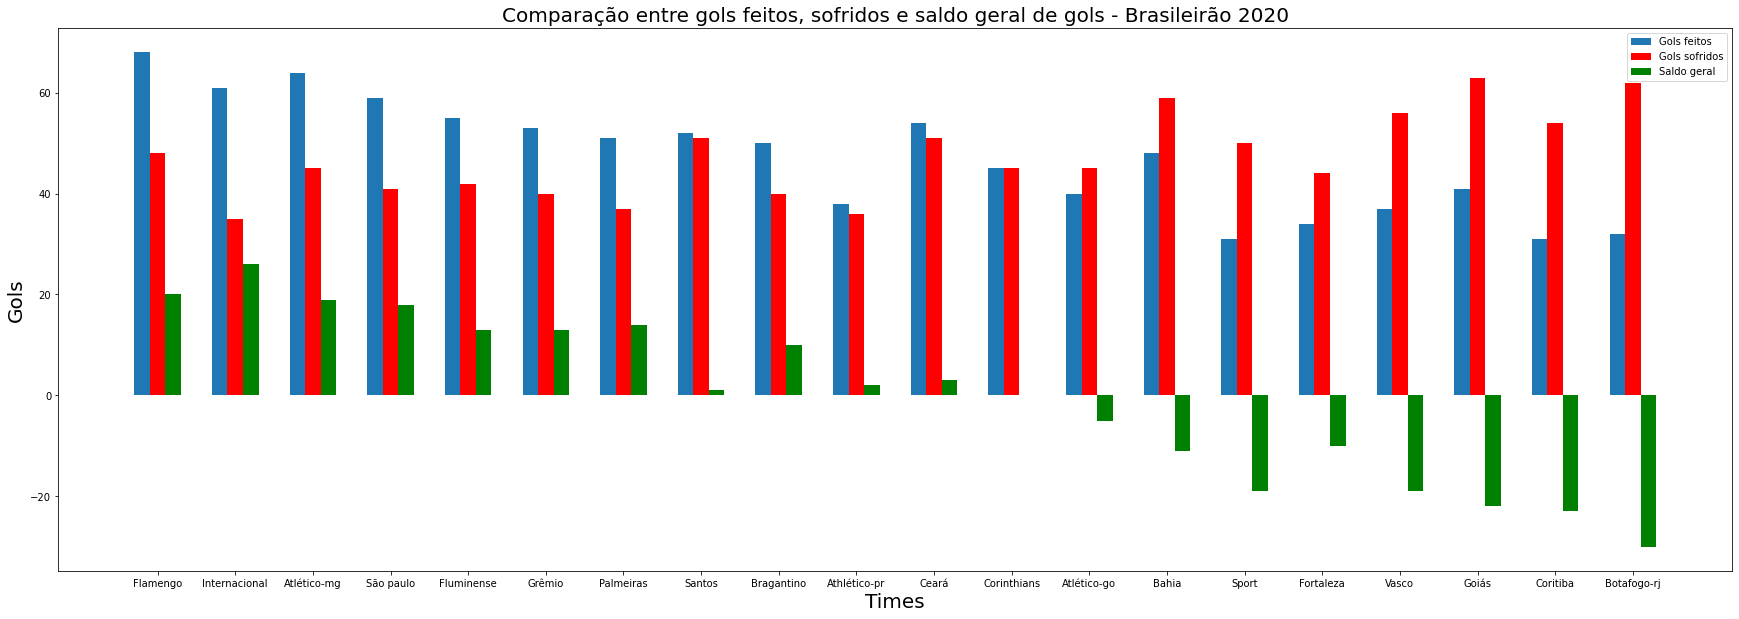

In [11]:
plt.figure(figsize=(30, 10))

Pos = np.array(range(len(dfTable)))
width = 0.2

plt.bar(Pos-width, dfTable['GP'], width=width, label='Gols feitos')
plt.bar(Pos, dfTable['GC'], width=width, color='red', label='Gols sofridos')
plt.bar(Pos+width, dfTable['SG'], width=width, color='green', label='Saldo geral')

plt.title('Comparação entre gols feitos, sofridos e saldo geral de gols - Brasileirão 2020', size=20)
plt.xlabel("Times", size=20)
plt.ylabel("Gols", size=20)

plt.xticks(Pos, dfTable['Clubes'])
plt.legend()
plt.show()

Para as próximas análises, ainda sobre o Brasileirão 2020, utilizaremos um segundo dataset correlacionado com os dados do primeiro. 

In [12]:
# Carrega o dataset
dfDataStatistic = pd.read_csv("./campeonato-brasileiro-estatisticas-full.csv", delimiter=";")

# String
dfDataStatistic = dfDataStatistic.applymap(str);
  
# Cria uma nova coluna "Finalizações(Chutes a gol)"
dfDataStatistic["Chutes(Chutes a gol)"] = dfDataStatistic["Chutes"].map(str) + "(" + dfDataStatistic["Chutes a gol"] + ")"

# Remove colunas desnecessárias 
dfDataStatistic = dfDataStatistic.drop(['Chutes', 'Chutes a gol'], axis=1)

# Exibe parte da tabela
dfDataStatistic

,ID,Mandante,Posse de bola,Passes,Precisão de passe,Faltas,Cartões amarelos,Cartões vermelhos,Impedimentos,Escanteios,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Chutes(Chutes a gol)
0,6041,1,45.0,326.0,nan,20.0,2.0,0.0,3.0,3.0,nan,nan,nan,nan,13.0(0.0)
1,6041,0,55.0,388.0,nan,21.0,2.0,0.0,0.0,5.0,nan,nan,nan,nan,16.0(0.0)
2,6040,1,50.0,406.0,nan,20.0,2.0,0.0,2.0,11.0,nan,nan,nan,nan,17.0(0.0)
3,6040,0,50.0,426.0,nan,14.0,4.0,0.0,4.0,2.0,nan,nan,nan,nan,10.0(0.0)
4,6042,1,74.0,702.0,nan,9.0,2.0,0.0,1.0,5.0,nan,nan,nan,nan,26.0(11.0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,8345,0,41.0,334.0,75.0,16.0,3.0,1.0,0.0,3.0,nan,nan,nan,nan,5.0(0.0)
4622,8346,1,47.0,390.0,78.0,11.0,3.0,0.0,0.0,10.0,nan,nan,nan,nan,16.0(5.0)
4623,8346,0,53.0,437.0,77.0,8.0,1.0,0.0,2.0,10.0,nan,nan,nan,nan,15.0(4.0)
4624,8347,1,38.0,307.0,76.0,16.0,2.0,0.0,0.0,2.0,nan,nan,nan,nan,8.0(3.0)


In [13]:
# Essa célula tem como função extrair do dfDataStatistic apenas as linhas que tem relaçao com o dataframe do Brasileirao 2020 extraido anteriormente
# Para isso, faremos o inner join dos dois dataframes

m = pd.merge(dfDataStatistic, brasilianLeague, how = 'inner', on = 'ID')

# Cria uma nova coluna e preenche com valores da coluna Mandante_y ou Visitante 
m["Clube"] = ""
m.loc[m['Mandante_x'] == '1', 'Clube'] = m['Mandante_y']
m.loc[m['Mandante_x'] == '0', 'Clube'] = m['Visitante']

# Dropa colunas desnecessárias
m = m.drop(['Data', 'Horário', 'Dia', 'Mandante_y', 'Visitante', 'Vencedor', 'Arena', 'Mandante Placar', 
            'Visitante Placar', 'Placar', 'Mandante_x', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'], axis=1)

# Altera a posição da coluna
first_column = m.pop('Clube')
m.insert(1, 'Clube', first_column)

# Remove linhas duplicadas
m.drop_duplicates(inplace=True)

m = m.reset_index()
m

,index,ID,Clube,Posse de bola,Passes,Precisão de passe,Faltas,Cartões amarelos,Cartões vermelhos,Impedimentos,Escanteios,Chutes(Chutes a gol),Rodada
0,0,7940,Fortaleza,43.0,414.0,86.0,14.0,3.0,1.0,1.0,4.0,11.0(3.0),1
1,1,7940,Athlético-PR,57.0,549.0,89.0,10.0,2.0,0.0,1.0,4.0,13.0(5.0),1
2,2,7941,Coritiba,42.0,382.0,74.0,11.0,3.0,0.0,3.0,2.0,2.0(0.0),1
3,3,7941,Internacional,58.0,504.0,81.0,21.0,4.0,0.0,2.0,6.0,11.0(4.0),1
4,4,7942,Sport,40.0,324.0,77.0,15.0,3.0,0.0,3.0,2.0,9.0(3.0),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,767,8314,Palmeiras,48.0,424.0,80.0,17.0,0.0,0.0,1.0,4.0,9.0(4.0),38
756,768,8311,Vasco,48.0,390.0,85.0,12.0,1.0,0.0,2.0,9.0,27.0(12.0),38
757,769,8311,Goiás,52.0,405.0,84.0,18.0,2.0,0.0,2.0,6.0,20.0(5.0),38
758,770,8310,Fluminense,48.0,401.0,86.0,10.0,0.0,0.0,0.0,3.0,9.0(3.0),38


A próxima célula verifica se há uma tendência para a relação entre a precisão de passe e posse de bola.

Text(9.924999999999997, 0.5, 'Precisão de passe em %')

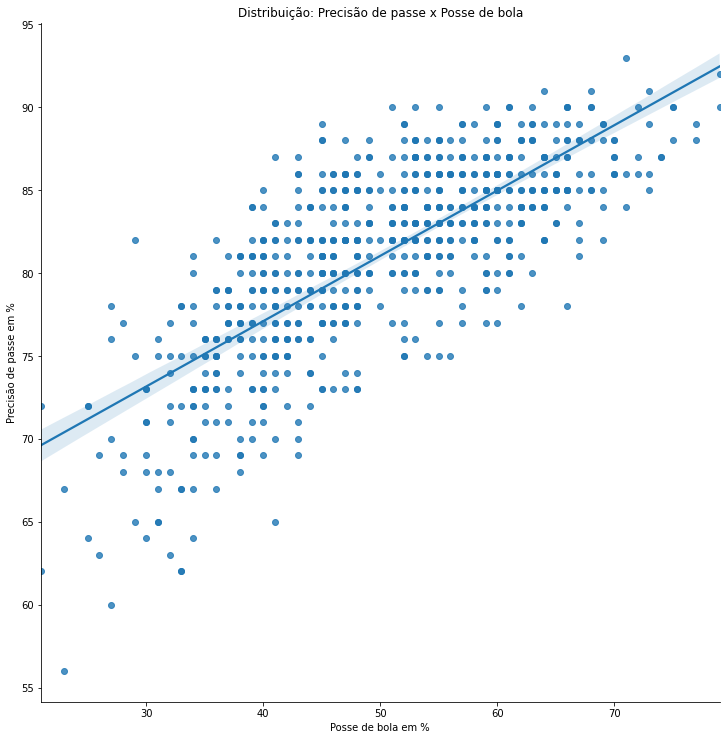

In [14]:
m['Posse de bola']= pd.to_numeric(m['Posse de bola'], errors='coerce')
m['Precisão de passe']= pd.to_numeric(m['Precisão de passe'], errors='coerce')

sn.lmplot(x='Posse de bola', y='Precisão de passe', data=m, height=10)

plt.title('Distribuição: Precisão de passe x Posse de bola')
plt.xlabel('Posse de bola em %')
plt.ylabel('Precisão de passe em %')

# Campeonatos ocorridos a partir de 2003

A seguir, com a curiosidade de saber o desempenho geral de todo os times participantes do Brasileirão a partir do ano 2003 até 2021, iremos criar uma nota tabela.

In [15]:
# Nova analise a seguir
dfNovo = dfDataChampionship
#m = m.drop(['Data', 'Horário', 'Dia', 'Mandante', 'Visitante'], axis=1)


filterNovo  =  dfNovo["Data"]>='2003-01-01'   # inicio das pontos corridos
filterNovo2  =  dfNovo["Data"]<='2021-02-26'  # ate o ultimo campeonato finalizado?

dfTeams = dfNovo[filterNovo & filterNovo2]

clubs1  =  pd.concat([dfTeams['Mandante'].str.lower(), dfTeams['Visitante'].str.lower()], axis=1, keys=['Clubes'])
cb1  =  pd.Series(clubs1['Clubes'].unique(), name="Clubes") # unique retorna valores sem repetição
cb1  =  cb1.to_frame() # convert Series to DataFrame 
cb1 # exibe o dataframe

dfTabela = cb1[["Clubes"]].copy()
for column in ["J", "PG", "V", "E", "D"]:
    dfTabela[column] = 0

for index, row in dfTabela.iterrows():
    c1  =  row['Clubes']
    c1  =  ensureUtf( c1 )
    c1  =  c1.strip()
    
    pg       =  getPoints(dfTeams, c1)
    j        =  getNumberDepartures(dfTeams, c1 )
    v        =  getNumberWinner(dfTeams, c1 )
    e        =  getDraw(dfTeams, c1 )
    d        =  getDefeats(dfTeams, c1 )
    

    dfTabela.at[index, 'J']   = j
    dfTabela.at[index, 'PG']  = pg
    dfTabela.at[index, 'V']   = v
    dfTabela.at[index, 'E']   = e
    dfTabela.at[index, 'D']   = d

dfTabela['Clubes'] = dfTabela['Clubes'].str.capitalize() 
dfTabela  =  dfTabela.sort_values(by=['V'], ascending=False) # ordena os valores
dfTabela  =  dfTabela.reset_index(drop=True)

dfTabela

,Clubes,J,PG,V,E,D
0,São paulo,704,1169,327,188,189
1,Santos,704,1097,305,182,217
2,Flamengo,704,1084,296,196,212
3,Cruzeiro,666,1030,293,151,222
4,Internacional,666,1043,292,167,207
5,Grêmio,662,1022,283,173,206
6,Corinthians,666,1035,281,192,193
7,Fluminense,704,999,270,189,245
8,Atlético-mg,666,973,267,172,227
9,Athlético-pr,666,955,266,157,243


Iremos escolher, aleatoriamente, dois times da tabela acima para fazer uma comparação visual.

In [16]:
dfCeFor = dfTabela.loc[(dfTabela['Clubes'].str.contains('Ceará') | dfTabela['Clubes'].str.contains('Fortaleza'))]
dfCeFor

,Clubes,J,PG,V,E,D
24,Fortaleza,202,236,61,53,88
27,Ceará,190,221,54,59,77


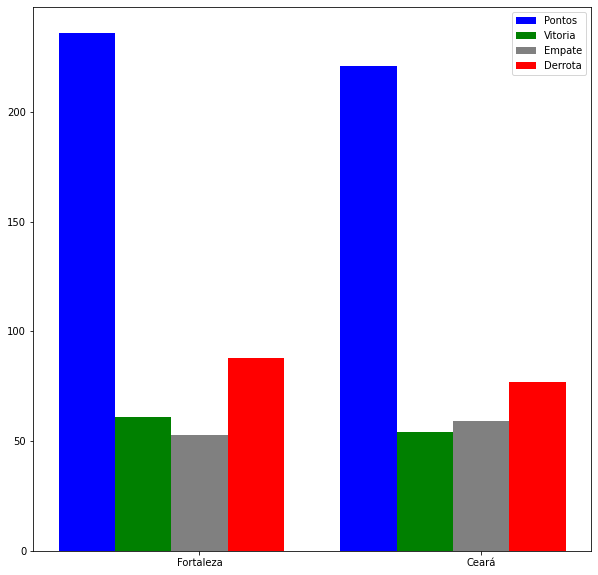

In [17]:
plt.figure(figsize=(10, 10))

Pos = np.array(range(len(dfCeFor)))
width = 0.2

plt.bar(Pos-2*width, dfCeFor['PG'], width=width, color='blue', label='Pontos')
plt.bar(Pos-width, dfCeFor['V'], width=width, color='green', label='Vitoria')
plt.bar(Pos, dfCeFor['E'], width=width, color='gray', label='Empate')
plt.bar(Pos+width, dfCeFor['D'], width=width, color='red', label='Derrota')

plt.xticks(Pos, dfCeFor['Clubes'])
plt.legend()
plt.show()

Analisamos, dentro do intervalo de data definido anteriormente (2003-2020), que há uma vantagem de pontos do Tricolor do Pici (Fortaleza) sobre o seu rival (Ceará). 

Entretanto, vale ressaltar que o Fortaleza jogou 202 vezes, enquanto que o Ceará jogou apenas 190 vezes. Assim, para se obter uma análise mais precisa, deveríamos levar em consideração a proporção de vezes que cada time jogou, entre outros fatores. 